Background of Data Set 

The NHS Quality and Outcomes Framework dataset contains disease prevalence reports on the clinical commission groups (CCG) level. Data is available between 2004 - 2020 and the major fields are NHS CCG, Register (Count) and Prevalence. CCGS level were identified by our determined inner and outer radius to focus our analyses. CCG Inner and Outer levels are defined as follows:

Inner Radius Location: 

Hillingdon CCG (includdes Heathrow Airport) 
East Berkshire CCG
Surrey Heartlands CCG
Buckinghamshire CCG
Hounslow CCG 
Ealing CCG

Outer Radius Location: 
Basildon and Brentwood CCG
Berkshire west CCG
Brent CCG
Croydon CCG
Guilford and Waverly CCG
Hammersmith and Fulham CCG
Harrow CCG
Herts Valley CCG
Kingston CCG
Merton CCG
Oxfordshire CCG
Richmond CCG
Surrey Heath CCG
Sutton CCG
Wandsworth CCG


In [1]:
#install a pip package in the current Jupyter kernal
import sys
!{sys.executable} -m pip install fingertips_py

In [2]:
# dark theme extension https://stackoverflow.com/questions/46510192/change-the-theme-in-jupyter-notebook
import fingertips_py as ftp
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
import os
pd.set_option('display.max_colwidth', -1)    # stop the column text truncating... 
pd.set_option("display.max_rows", None, "display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# concat indicator data, output as a CSV file
def _concat_output_data(indicator_ids, name):
    directory = './data_output/{0}'.format(name)

    if not os.path.exists(directory):
        os.makedirs(directory)
        
    lst_df = []
    for id in indicator_ids:
        tmp_d = ftp.get_data_for_indicator_at_all_available_geographies(id)
        lst_df.append(tmp_d)
        
    tmp_concat = pd.concat(lst_df, axis=0, ignore_index=True)
    
    tmp_concat.to_csv(directory + '/' +  name + '.csv')
    
    # free memory
    tmp_concat= None 
    lst_df = None

In [4]:
_concat_output_data([91280,219, 241,273,262,258,212,280,253,285], 'nhs_qof_dataset')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (9,10,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option

In [24]:
qof_df = pd.read_csv('./data_output/nhs_qof_dataset/nhs_qof_dataset.csv')
qof_df['Area Type'].unique() 

array(['England', 'STP (since 4/20)', 'STP (pre 4/20)',
       'PCN (v. 29/10/20)', 'County & UA (4/19-3/20)', 'CCGs (since 4/20)',
       'CCGs (2019/20)', 'CCGs (2018/19)', 'GP',
       'District & UA (4/19-3/20)', 'County & UA (pre 4/19)',
       'District & UA (pre 4/19)', 'Region', 'CCGs (2017/18)'], dtype=object)

In [23]:
qof_df['Area Type'].unique()

array(['CCGs (since 4/20)'], dtype=object)

In [26]:
# restrict the dataframe to CCG to make consistent with the mortality and admission indicators.
qof_df = qof_df[qof_df['Area Type']== 'CCGs (2019/20)']

In [8]:
qof_df['Indicator Name'].unique()

array(['Estimated smoking prevalence (QOF)',
       'Hypertension: QOF prevalence (all ages)',
       'Diabetes: QOF prevalence (17+)', 'CHD: QOF prevalence (all ages)',
       'Heart Failure: QOF prevalence (all ages)',
       'CKD: QOF prevalence (18+)', 'Stroke: QOF prevalence (all ages)',
       'Atrial fibrillation: QOF prevalence',
       'COPD: QOF prevalence (all ages)',
       'Asthma: QOF prevalence (all ages)'], dtype=object)

In [27]:
# restrict the Df to CCGs in our inner/outer radius   (use .isin(() ))
inner_ccgs = ['NHS Buckinghamshire CCG', 'NHS Ealing CCG', 'NHS East Berkshire CCG', 'NHS Hillingdon CCG',
 'NHS Hounslow CCG', 'NHS North West Surrey CCG']
outer_ccgs =  ['NHS Basildon And Brentwood CCG', 'NHS Berkshire West CCG', 
               'NHS Brent CCG', 'NHS Croydon CCG', 'NHS Guildford and Waverley CCG', 
               'NHS Hammersmith And Fulham CCG', 'NHS Harrow CCG', 'NHS Herts Valleys CCG', 
               'NHS Kingston CCG', 'NHS Merton CCG', 'NHS Oxfordshire CCG', 'NHS Richmond CCG', 
               'NHS Surrey Heath CCG', 'NHS Sutton CCG', 'NHS Wandsworth CCG']   
qof_df = qof_df[qof_df['Area Name'].isin(inner_ccgs + outer_ccgs)]

In [19]:
qof_df.head()

,Unnamed: 0,Indicator ID,Indicator Name,Parent Code,Parent Name,Area Code,Area Name,Area Type,Sex,Age,Category Type,Category,Time period,Value,Lower CI 95.0 limit,Upper CI 95.0 limit,Lower CI 99.8 limit,Upper CI 99.8 limit,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Compared to percentiles,Time period Sortable,New data,Compared to goal
9556,9556,91280,Estimated smoking prevalence (QOF),E92000001,England,E38000007,NHS Basildon And Brentwood CCG,CCGs (since 4/20),Persons,15+ yrs,NaN,NaN,2013/14,18.686186,18.524056,18.849407,NaN,NaN,41215.0,220564.0,NaN,NaN,Lower,Not compared,20130000,NaN,NaN
9562,9562,91280,Estimated smoking prevalence (QOF),E92000001,England,E38000020,NHS Brent CCG,CCGs (since 4/20),Persons,15+ yrs,NaN,NaN,2013/14,17.331490,17.194525,17.469317,NaN,NaN,50531.0,291556.0,NaN,NaN,Lower,Not compared,20130000,NaN,NaN
9576,9576,91280,Estimated smoking prevalence (QOF),E92000001,England,E38000048,NHS Ealing CCG,CCGs (since 4/20),Persons,15+ yrs,NaN,NaN,2013/14,16.139866,16.014609,16.265913,NaN,NaN,53151.0,329315.0,NaN,NaN,Lower,Not compared,20130000,NaN,NaN
9586,9586,91280,Estimated smoking prevalence (QOF),E92000001,England,E38000070,NHS Hammersmith And Fulham CCG,CCGs (since 4/20),Persons,15+ yrs,NaN,NaN,2013/14,20.088930,19.900885,20.278302,NaN,NaN,34788.0,173170.0,NaN,NaN,Higher,Not compared,20130000,NaN,NaN
9587,9587,91280,Estimated smoking prevalence (QOF),E92000001,England,E38000074,NHS Harrow CCG,CCGs (since 4/20),Persons,15+ yrs,NaN,NaN,2013/14,13.216264,13.070493,13.363411,NaN,NaN,27147.0,205406.0,NaN,NaN,Lower,Not compared,20130000,NaN,NaN


In [10]:
# Value                                       1241 non-null float64

In [12]:
qof_df.head()

,Unnamed: 0,Indicator ID,Indicator Name,Parent Code,Parent Name,Area Code,Area Name,Area Type,Sex,Age,Category Type,Category,Time period,Value,Lower CI 95.0 limit,Upper CI 95.0 limit,Lower CI 99.8 limit,Upper CI 99.8 limit,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Compared to percentiles,Time period Sortable,New data,Compared to goal
9556,9556,91280,Estimated smoking prevalence (QOF),E92000001,England,E38000007,NHS Basildon And Brentwood CCG,CCGs (since 4/20),Persons,15+ yrs,NaN,NaN,2013/14,18.686186,18.524056,18.849407,NaN,NaN,41215.0,220564.0,NaN,NaN,Lower,Not compared,20130000,NaN,NaN
9562,9562,91280,Estimated smoking prevalence (QOF),E92000001,England,E38000020,NHS Brent CCG,CCGs (since 4/20),Persons,15+ yrs,NaN,NaN,2013/14,17.331490,17.194525,17.469317,NaN,NaN,50531.0,291556.0,NaN,NaN,Lower,Not compared,20130000,NaN,NaN
9576,9576,91280,Estimated smoking prevalence (QOF),E92000001,England,E38000048,NHS Ealing CCG,CCGs (since 4/20),Persons,15+ yrs,NaN,NaN,2013/14,16.139866,16.014609,16.265913,NaN,NaN,53151.0,329315.0,NaN,NaN,Lower,Not compared,20130000,NaN,NaN
9586,9586,91280,Estimated smoking prevalence (QOF),E92000001,England,E38000070,NHS Hammersmith And Fulham CCG,CCGs (since 4/20),Persons,15+ yrs,NaN,NaN,2013/14,20.088930,19.900885,20.278302,NaN,NaN,34788.0,173170.0,NaN,NaN,Higher,Not compared,20130000,NaN,NaN
9587,9587,91280,Estimated smoking prevalence (QOF),E92000001,England,E38000074,NHS Harrow CCG,CCGs (since 4/20),Persons,15+ yrs,NaN,NaN,2013/14,13.216264,13.070493,13.363411,NaN,NaN,27147.0,205406.0,NaN,NaN,Lower,Not compared,20130000,NaN,NaN


In [11]:
# Question, find out, whether there are Nans,. if so, which CCGs? (and are the nans across all years for this ccg or only one year etc?)
qof_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1331 entries, 9556 to 841462
Data columns (total 27 columns):
Unnamed: 0                                  1331 non-null int64
Indicator ID                                1331 non-null int64
Indicator Name                              1331 non-null object
Parent Code                                 1331 non-null object
Parent Name                                 1331 non-null object
Area Code                                   1331 non-null object
Area Name                                   1331 non-null object
Area Type                                   1331 non-null object
Sex                                         1331 non-null object
Age                                         1331 non-null object
Category Type                               0 non-null object
Category                                    0 non-null object
Time period                                 1331 non-null object
Value                                       1331 no

In [33]:
qof_df.isna().sum()

Unnamed: 0                                  0   
Indicator ID                                0   
Indicator Name                              0   
Parent Code                                 0   
Parent Name                                 0   
Area Code                                   0   
Area Name                                   0   
Area Type                                   0   
Sex                                         0   
Age                                         0   
Category Type                               2163
Category                                    2163
Time period                                 0   
Value                                       0   
Lower CI 95.0 limit                         0   
Upper CI 95.0 limit                         0   
Lower CI 99.8 limit                         972 
Upper CI 99.8 limit                         972 
Count                                       0   
Denominator                                 0   
Value note          

In [30]:
len(qof_df['Area Name'].unique())

21

In [32]:
len(outer_ccgs+inner_ccgs)

21

In [36]:
qof_df['Time period Sortable'] =  pd.to_datetime(
    (qof_df['Time period Sortable']/10000).astype(int),
    format='%Y').dt.year

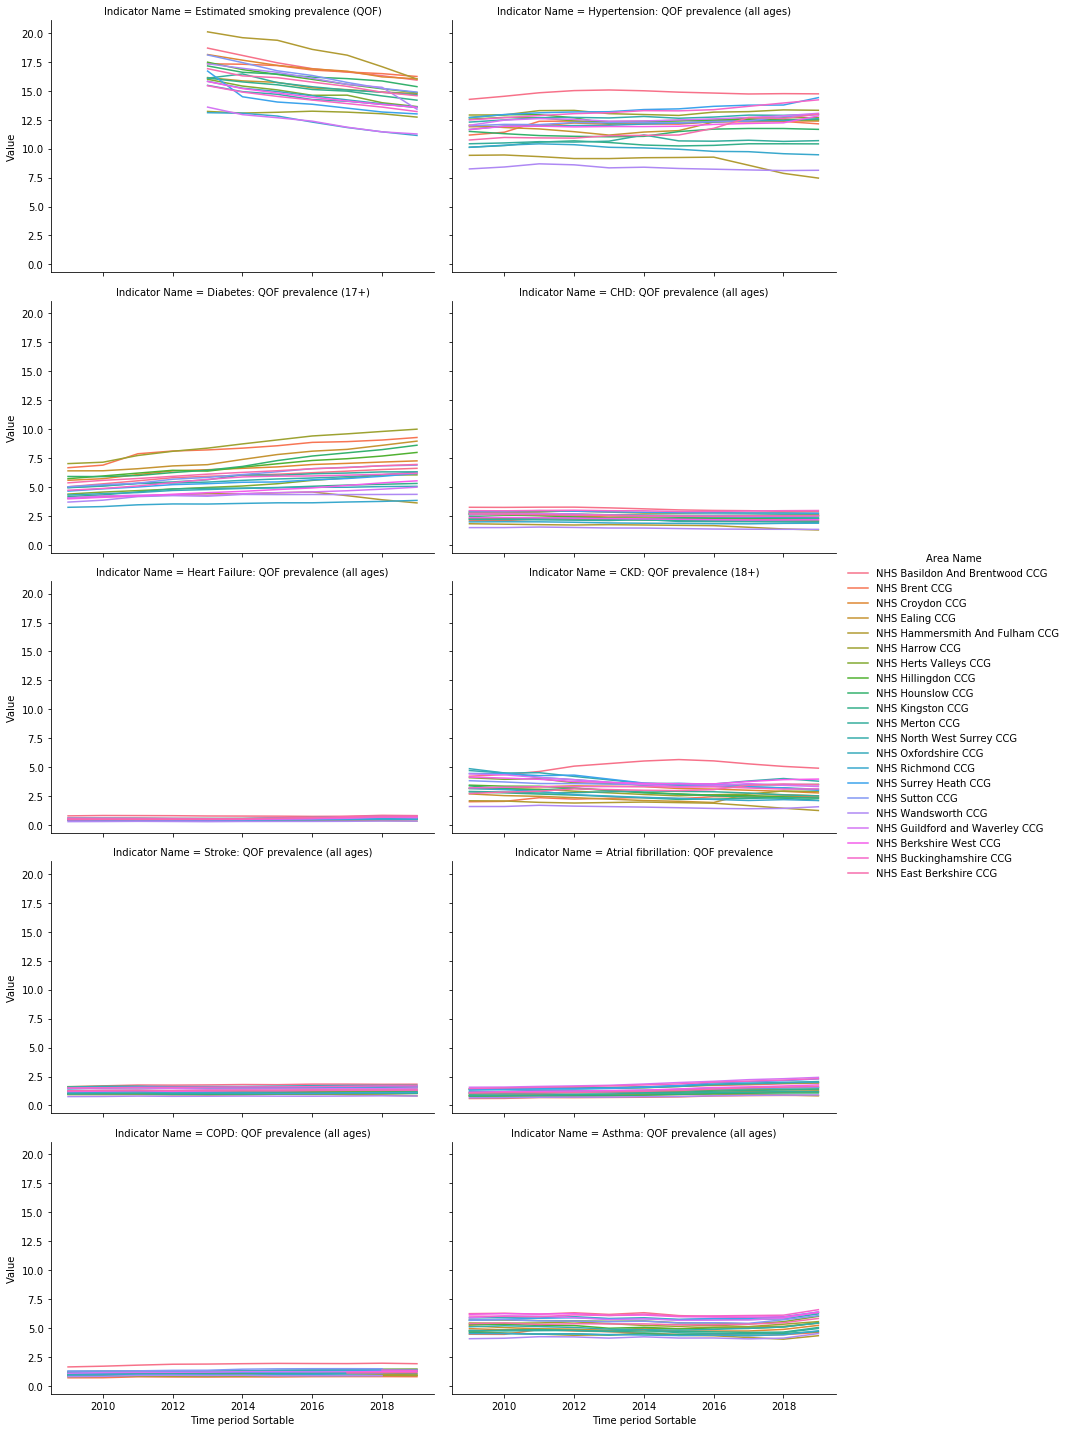

In [37]:
qof_df_small = qof_df[qof_df['Sex']== 'Persons'][['Indicator Name', 'Area Name', 'Time period Sortable', 'Value']]
g = sns.FacetGrid(qof_df_small, col='Indicator Name', hue='Area Name', col_wrap=2,height=4, aspect=1.5)
g.map(sns.lineplot, 'Time period Sortable', 'Value')
g.add_legend()  

Summary 

After our preliminary EDA and Data cleaning, we can state that the data set is clean. There are no missing values of 0/Nan across all indicators and CCGs.  